In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

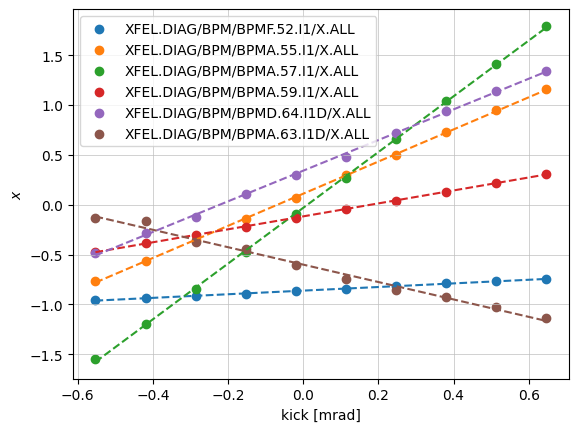

In [20]:
df = pd.read_pickle("C:/Users/veglia/Downloads/measurement-2025-02-18/CIX.51.I1.pkl")
arr=df.to_numpy()
bpms_x = [i for i in list(df)[1:] if i[-5] == 'X']
bpms_y = [i for i in list(df)[1:] if i[-5] == 'Y']

fitx={}
for col in bpms_x:
    plt.scatter(arr[:,0],df[col],label=col)
    coef = np.polyfit(arr[:,0], df[col], 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(arr[:,0], poly1d_fn(arr[:,0]), '--')
    fitx[col]=coef
plt.xlabel('kick [mrad]')
plt.ylabel('$x$')
plt.legend()

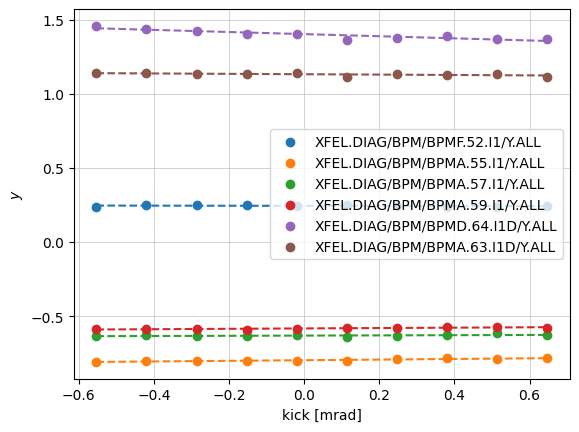

In [21]:
fit={}
for col in bpms_y:
    plt.scatter(arr[:,0],df[col],label=col)
    coef = np.polyfit(arr[:,0], df[col], 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(arr[:,0], poly1d_fn(arr[:,0]), '--')
    fit[col]=coef
plt.xlabel('kick [mrad]')
plt.ylabel('$y$')
plt.legend()


In [22]:
fit

{'XFEL.DIAG/BPM/BPMF.52.I1/Y.ALL': array([-0.00323039,  0.24434922]),
 'XFEL.DIAG/BPM/BPMA.55.I1/Y.ALL': array([ 0.02093161, -0.79668985]),
 'XFEL.DIAG/BPM/BPMA.57.I1/Y.ALL': array([ 0.00695738, -0.63071165]),
 'XFEL.DIAG/BPM/BPMA.59.I1/Y.ALL': array([ 0.01303059, -0.58239931]),
 'XFEL.DIAG/BPM/BPMD.64.I1D/Y.ALL': array([-0.07133492,  1.40248421]),
 'XFEL.DIAG/BPM/BPMA.63.I1D/Y.ALL': array([-0.01295329,  1.13197134])}

In [3]:
dir = os.listdir("C:/Users/veglia/Downloads/measurement-2025-02-18")
for file in dir:
    print(file)

CIX.51.I1.pkl
CIX.57.I1.pkl
CIY.51.I1.pkl
CIY.55.I1.pkl
CIY.58.I1.pkl


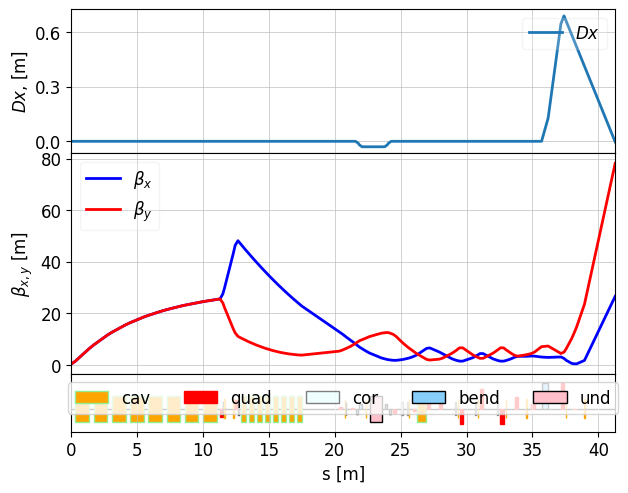

In [37]:
import sys
#sys.path.append(ocelot_dir)
sys.path.insert(1, "../")
from s2e_sections.sections import *
from ocelot.utils.section_track import *
from ocelot.gui.accelerator import *
import time
from ocelot.common.globals import *
from ocelot import *

sections = [A1, AH1, LH, I1D]

tws0 = Twiss()
tws0.E = 0.005
tws0.beta_x  =  0.2865426867699372
tws0.beta_y  =  0.2865426867699381
tws0.alpha_x = -0.8390696483216487
tws0.alpha_y = -0.8390696483216522

section_lat = SectionLattice(sequence=sections, tws0=tws0)
# plot twiss parameters
method = {'global': TransferMap}
lat = MagneticLattice(section_lat.elem_seq, method=method)
plot_opt_func(lat, section_lat.tws)
plt.show()

In [53]:
test_name = "CIX.51.I1.pkl"
test_name.rsplit(".pkl")

['CIX.51.I1', '']

In [65]:
[ele for ele in lat.sequence if isinstance(ele, Monitor)]

[<Monitor: name=BPMC.38I.I1 at 0x1b159ec7cd0>,
 <Monitor: name=BPMR.38II.I1 at 0x1b159ec7d60>,
 <Monitor: name=BPMF.47.I1 at 0x1b159ec7df0>,
 <Monitor: name=BPMF.48.I1 at 0x1b159ec7e80>,
 <Monitor: name=BPMF.52.I1 at 0x1b159ec7f10>,
 <Monitor: name=BPMA.55.I1 at 0x1b159ec7fa0>,
 <Monitor: name=BPMA.57.I1 at 0x1b159f10070>,
 <Monitor: name=BPMA.59.I1 at 0x1b159f10100>,
 <Monitor: name=BPMA.60.I1 at 0x1b159f10190>,
 <Monitor: name=BPMA.63.I1D at 0x1b159f11390>]

CIX.51.I1.pkl
r12 meas = [0.18155448257669213, 1.6125253660621162, 2.797412851373946, 0.650170978504186] 
r12 ocel = [0.2015, 1.597433489664735, 2.9844393395932802, 0.9649036293063274]
diff     = [-0.019945517423307885, 0.015091876397381077, -0.1870264882193342, -0.3147326508021414]
CIX.57.I1.pkl
r12 meas = [7.959102379117791e-05, 0.0022985901222219184, 0.197171028133347, 1.8574234036575952] 
r12 ocel = [0.0, 0.0, 0.25, 2.2430302066991468]
diff     = [7.959102379117791e-05, 0.0022985901222219184, -0.052828971866653, -0.3856068030415516]
CIY.51.I1.pkl
r34 meas = [0.6802962958174816, 6.434011884062599, 4.6115078343613565, 5.30329355845458] 
r34 ocel = [0.6045, 5.48571684092036, 4.163438458191814, 4.854396459607753]
diff     = [0.0757962958174816, 0.948295043142239, 0.4480693761695429, 0.44889709884682727]
CIY.55.I1.pkl
r34 meas = [-0.01728989090524347, 0.19108512615631768, 1.329257926838818, 4.094101707455182] 
r34 ocel = [0.0, 0.25, 1.5306248777307936, 3.929834337607746]
diff     = [-0.

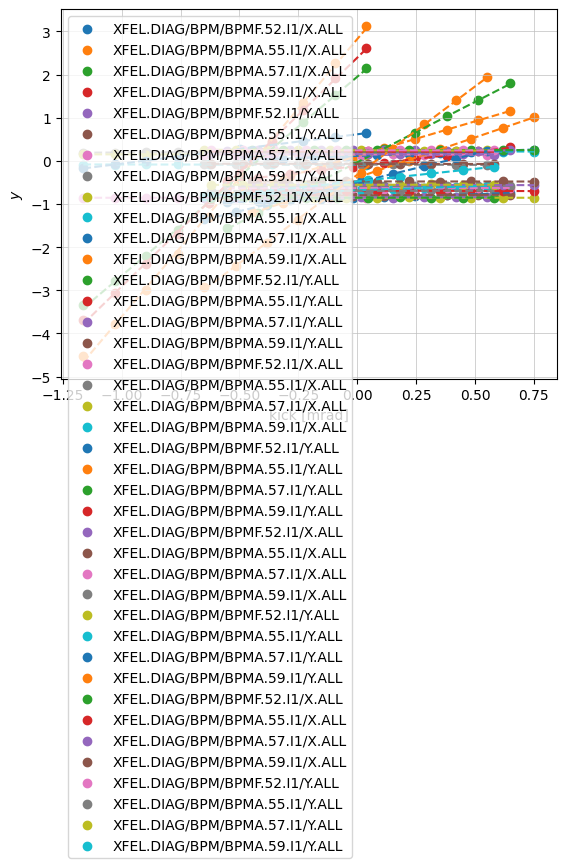

In [74]:
dirname="C:/Users/veglia/Downloads/measurement-2025-02-18"
filelist = os.listdir(dirname)
bpms = [i1.bpmf_52_i1,i1.bpma_55_i1,i1.bpma_57_i1,i1.bpma_59_i1]#, i1d.bpmd_64_i1d, i1d.bpma_63_i1d ]
r34s_meas={}
r12s_meas={}
for file in filelist:
    df = pd.read_pickle(f'{dirname}/{file}')
    print(file)
    arr=df.to_numpy()
    bpms_x = [i for i in list(df)[1:9] if i[-5] == 'X']
    bpms_y = [i for i in list(df)[1:9] if i[-5] == 'Y']

    fitx={}

    for col in bpms_x:
        plt.scatter(arr[:,0],df[col],label=col)
        coef = np.polyfit(arr[:,0], df[col], 1)
        poly1d_fn = np.poly1d(coef)
        plt.plot(arr[:,0], poly1d_fn(arr[:,0]), '--')
        fitx[col]=coef
    plt.xlabel('kick [mrad]')
    plt.ylabel('$x$')
    plt.legend()
    #plt.show()
    fit={}
    for col in bpms_y:
        plt.scatter(arr[:,0],df[col],label=col)
        coef = np.polyfit(arr[:,0], df[col], 1)
        poly1d_fn = np.poly1d(coef)
        plt.plot(arr[:,0], poly1d_fn(arr[:,0]), '--')
        fit[col]=coef 
    plt.xlabel('kick [mrad]')
    plt.ylabel('$y$')
    plt.legend()
    #plt.show()
    ci,pos,_,_ = file.split('.')
#   start = f'i1.{ci.lower()}_{pos}_i1'
    cname, _ = file.rsplit(".pkl")

    [ele for ele in lat.sequence if ele.id == cname][0]
    start = next(ele for ele in lat.sequence if ele.id == cname)
    r12s=[]
    r34s=[]
    for bpm in bpms:
        B, R, T = lat.transfer_maps(start=start, stop=bpm, energy=130e-3)
        r12s.append(float(R[0,1]))
        r34s.append(float(R[2,3]))

    
    r34s_measured = [float(v) for (v, _) in fit.values()]
    r12s_measured = [float(v) for (v, _) in fitx.values()]

    if ci[2]=='X':
        print(f'r12 meas = {r12s_measured} \nr12 ocel = {r12s}')
        diff = [r12s_measured[i] - r12s[i] for i in range(len(r12s))]
        r12s_meas[file]=r12s_measured
    else:
        print(f'r34 meas = {r34s_measured} \nr34 ocel = {r34s}')  
        diff = [r34s_measured[i] - r34s[i] for i in range(len(r34s))]
        r34s_meas[file]=r34s_measured
    #plt.scatter(r34s_measured,diff)
    #plt.show()
    print(f'diff     = {diff}')


In [75]:
r34s_meas

{'CIY.51.I1.pkl': [0.6802962958174816,
  6.434011884062599,
  4.6115078343613565,
  5.30329355845458],
 'CIY.55.I1.pkl': [-0.01728989090524347,
  0.19108512615631768,
  1.329257926838818,
  4.094101707455182],
 'CIY.58.I1.pkl': [-0.003765364354482555,
  0.0025644816494458595,
  0.0034546256295024196,
  0.5774234579023996]}

In [13]:
from scipy.optimize import fmin
def match_matrix(lat, start, stops, target_vals, quads):
    def error_func(x):
        for i in range(len(quads)):
            if quads[i].__class__ == Quadrupole:
                quads[i].k1 = x[i]
        r34s = []
        r12s = []
        for stop in stops:
            B, R, T = lat.transfer_maps(start=start, stop=stop, energy=130e-3)
            r34 = R[2,3]
            r12 = R[1,2]
            r34s.append(r34)
            r12s.append(r12)
        if start.id[2]=='X':
           err = (np.linalg.norm(np.array(r12s) - target_vals)**2).sum()
        else:
           err = (np.linalg.norm(np.array(r34s) - target_vals)**2).sum() 
           
        return err

    x = [0.0] * len(quads)

    for i, quad in enumerate(quads):
        if quad.__class__ != Quadrupole:
            raise ValueError("Nope")
        x[i] = quad.k1

    print("initial value: x = ", x)

    return fmin(error_func, x, xtol=1e-8, maxiter=20000, maxfun=20000)

In [23]:
i1.bpma_57_i1,i1.bpma_59_i1
i1.qi_54_i1,i1.qi_55_i1

(<Quadrupole: name=QI.54.I1 at 0x1b159ec4fd0>,
 <Quadrupole: name=QI.55.I1 at 0x1b159ec5060>)

In [25]:
bpms

[<Monitor: name=BPMF.52.I1 at 0x1f1243efbb0>,
 <Monitor: name=BPMA.55.I1 at 0x1f1243efc40>,
 <Monitor: name=BPMA.57.I1 at 0x1f1243efcd0>,
 <Monitor: name=BPMA.59.I1 at 0x1f1243efd60>]

In [42]:
#match_matrix(lat, start=i1.ciy_58_i1, stops=[i1.bpma_55_i1], quads=[i1.qi_55_i1] , target_vals=r34s_meas['CIY.58.I1.pkl'][1])
match_matrix(lat, start=i1.ciy_58_i1, stops=[i1.bpma_59_i1], quads=[i1.qi_59_i1] , target_vals=r34s_meas['CIY.58.I1.pkl'][3])
#match_matrix(lat, start=i1.ciy_58_i1, stops=[i1.bpma_59_i1], quads=[i1.qi_59_i1] , target_vals=r34s_meas['CIY.58.I1.pkl'][3])

initial value: x =  [-2.6383360780016827]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 62


array([-5.03327839])

In [77]:
r34s_meas['CIY.51.I1.pkl']

[0.6802962958174816, 6.434011884062599, 4.6115078343613565, 5.30329355845458]

In [80]:
bpms = [i1.bpmf_52_i1,i1.bpma_55_i1,i1.bpma_57_i1,i1.bpma_59_i1]
for bpm in bpms:
    B, R, T = lat.transfer_maps(start=i1.ciy_51_i1, stop=bpm, energy=130e-3)
    r34_ocelot= R[2,3]
    print(f'{r34_ocelot=}')

r34_ocelot=np.float64(0.6045)
r34_ocelot=np.float64(6.117712568327356)
r34_ocelot=np.float64(4.603842966586066)
r34_ocelot=np.float64(5.303293566036629)


In [70]:
r34s_meas

{'CIY.51.I1.pkl': [0.6802962958174816,
  6.434011884062599,
  4.6115078343613565,
  5.30329355845458],
 'CIY.55.I1.pkl': [-0.01728989090524347,
  0.19108512615631768,
  1.329257926838818,
  4.094101707455182],
 'CIY.58.I1.pkl': [-0.003765364354482555,
  0.0025644816494458595,
  0.0034546256295024196,
  0.5774234579023996]}

In [79]:
match_matrix(lat, start=i1.ciy_51_i1, stops=[i1.bpma_55_i1], quads=[i1.qi_53_i1] , target_vals=r34s_meas['CIY.51.I1.pkl'][1])
match_matrix(lat, start=i1.ciy_51_i1, stops=[i1.bpma_57_i1], quads=[i1.qi_54_i1] , target_vals=r34s_meas['CIY.51.I1.pkl'][2])
match_matrix(lat, start=i1.ciy_51_i1, stops=[i1.bpma_59_i1], quads=[i1.qi_55_i1] , target_vals=r34s_meas['CIY.51.I1.pkl'][3])

initial value: x =  [np.float64(3.830989721411587)]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 60
initial value: x =  [np.float64(-1.3885957857703022)]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 52
initial value: x =  [np.float64(-1.7813512913632037)]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 50


array([-1.78533285])

In [ ]:
match_matrix(lat, start=i1.ciy_51_i1, stops=[i1.bpma_59_i1], quads=[i1.qi_55_i1] , target_vals=r34s_meas['CIY.55.I1.pkl'][3])

initial value: x =  [np.float64(-3.1472530294435446)]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 60


array([-1.41623132])

In [55]:
for quad in [i1.qi_53_i1,i1.qi_54_i1,i1.qi_55_i1]:
    print(quad.k1)

2.1047941922719344
0.7943661157716433
-1.4162313256081929


In [81]:
# bpms = [i1.bpmf_52_i1,i1.bpma_55_i1,i1.bpma_57_i1,i1.bpma_59_i1]
screens = [ i1.otrc_58_i1, i1.otrc_59_i1]
i1.tdsa_52_i1.l = 0.7 / 2
for screen in screens:
    B, R, T = lat.transfer_maps(start=i1.tds_start, stop=screen, energy=130e-3)
    r34_screen= R[2,3]
    print(f'{screen.id}, R34 = {r34_screen}')

OTRC.58.I1, R34 = 3.8201146777919996
OTRC.59.I1, R34 = 1.9884830126276027


In [36]:
from ocelot.utils.acc_utils import beam2rf

In [38]:
beam2rf(E1=130.3e-3,chirp=-9.09,curvature=180,skewness=21400,n=3, freq=1.3e9)

(np.float64(0.14640994601458784),
 np.float64(12.493452325283183),
 np.float64(0.019787865063885628),
 np.float64(-191.46438800708347))